## Фаза 1. Неделя 1. Понедельник

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st

## Статистика и распределения

**1.** В рамках исследования рынка продуктового ассортимента компании, было определено, что у трех товаров имеются следующие ценовые значения: $2, 4$ и $6$ условных единиц. Мы провели анализ и выяснили, что средняя цена товаров составляет $\mathbb{E} \left[ X \right] = 4.2$, а дисперсия цен равна $\mathbb{D} \left[X \right] = 1.96$. Найти вероятности покупки каждого из товаров  

`Примечание: получившуюся систему линейных уравнений можно решить с помощью любого онлайн калькулятора`

|  случайная величина X   | 2 | 4    | 6   |
|------|---|------|------|
| вероятность p | ? | ? | ? |

In [2]:
x = np.array([2,4,6])
EX = 4.2
DX = 1.96
EX2 = DX + EX**2 # мат ожидание 

# Составляем систему для уровненией:
# 1) p1 + p2 + p3 = 1
# 2) 2p1 + 4p2 + 6p3 = 4.2
# 3) 4p1 +16p2 +36p3 = 19.6
A = np.array([
    [1, 1, 1],
    [2, 4, 6],
    [4, 16, 36]
], dtype=float)

b = np.array([1, EX, EX2], dtype=float)
p = np.linalg.solve(A, b)
print(p)

[0.2 0.5 0.3]


> ответ тут

**2.** Контрольная работа состоит из трех вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составить закон распределения числа правильных ответов при простом угадывании. Найти $\mathbb{E}(X)$, $\mathbb{D}(X)$.


In [3]:
n =3 
p = 0.75 # вероятность ошибки в одном задание 
dist = st.binom(n=n, p=p)
k = np.arange(0, n+1)
probs = dist.pmf(k) # вероятности P(X=k)
print(f"Мат ожидание: ", dist.mean())
print(f'Дисперсия:', dist.var())
 

Мат ожидание:  2.25
Дисперсия: 0.5625


> ответ тут

**3.** Дан закон распределения случайной величины: 

|  2   | 5 | 8    | 11   |
|------|---|------|------|
| 0.46 | ? | 0.11 | 0.14 |

* Найди неизвестную вероятность и объясните, почему ответ именно такой. 

In [4]:
#Сумма всех вероятностей должна быть ровна 1
p5 = 1 - 0.46 - 0.11 - 0.14 
round(p5, 2)

0.29

> ответ тут

* Визуализируй функцию распределения по полученному в предыдущем пункте результату

<StemContainer object of 3 artists>

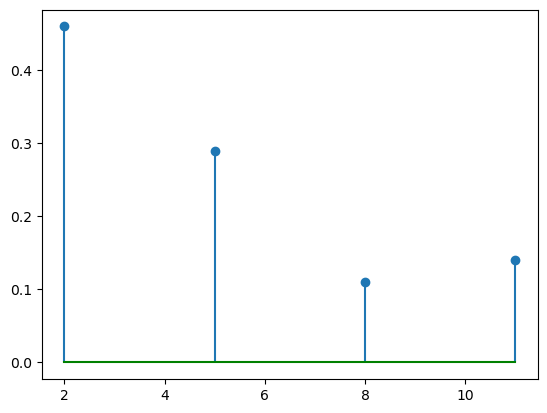

In [5]:
# code 
x = np.array([2, 5, 8 ,11])
y = np.array([0.46, 0.29, 0.11, 0.14])
plt.stem(x, y, basefmt='green')


**4.** Мы являемся владельцами розничного магазина и хотим оптимизировать нашу обслуживающую систему, чтобы обеспечить удобство покупателей и эффективность работы магазина. Известно, что в среднем в магазин заходит 3 человека в минуту. Нам бы хотелось оценить все вероятности потока людей, что правильно планировать наши ресурсы

* Что это за распределение?

> ответ тут Пуасона, потому что есть промежуток времени и колл-во 

* Найти вероятность того, что за 2 минуты в магазин зайдет не более 1 человека.

> ответ тут 1,7%

* Визуализируй это распределение с вычисленным параметром с помощью бибилиотеки `scipy`

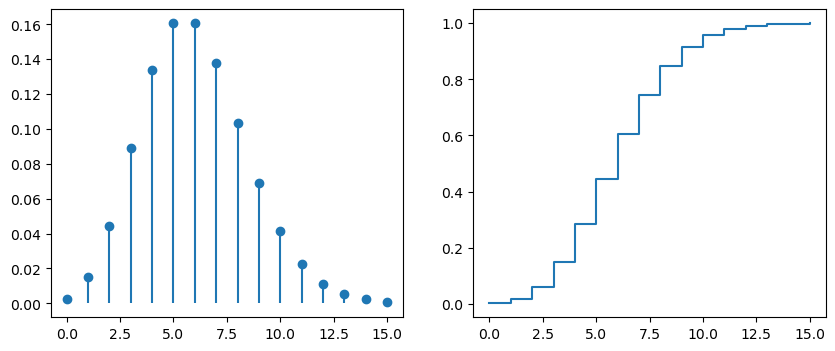

In [6]:
# code
from scipy.stats import poisson
lam = 3 
t = 2 
mu = lam * t 
k = np.arange(0,  16)

pmf = poisson.pmf(k, mu)
cdf = poisson.cdf(k, mu)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.stem(k, pmf, basefmt=" ")

plt.subplot(1,2,2)
plt.step(k, cdf, where="post")


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "stat tasks in progress"`
4. Выполни команду `git push`

In [7]:
# code

**5.** Нами закуплен новый станок для работы по металлу. Известно, что время работы этого станка до первого отказа подчиняется показательному(экспоненциальному) распределению со средним значением 1 год. Отказ этого станка для нас это огромные убытки. 

* Какова вероятность, что до первого отказа пройдет не менее 2 лет?

> ответ тут

* Визуализируй это распределение

In [13]:
# code 
from scipy.stats import expon
t = 2 
mean = 1 
prob = expon.sf(t, scale= mean)
round(prob,3)

np.float64(0.135)

**6.** С базы в магазин отправлено 4000 тщательно упакованных доброкачественных изделий. Вероятность того, что изделие повредится в пути, равна 0.0005.

* Что это за распределение?

> Биноминальное

* Найти вероятность того, что из 4000 изделий в магазин прибудут 3 испорченных изделия.

In [18]:
from scipy.stats import binom
n = 4000
p = 0.0005
k = 3
binom = binom.pmf(k, n, p)
round(binom,2)

np.float64(0.18)

> ответ тут

**7.** Рост мальчиков возрастной группы 15 лет - нормально распределённая случайная величина $X$ с параметрами $\mu=161$ см и $\sigma=4$ см.
* Какую долю костюмов для мальчиков, имеющих рост от 152 до 158 см, нужно предусмотреть в объёме производства для данной возрастной группы?

> ответ тут

In [20]:
from scipy.stats import norm
prob = norm.cdf(158, loc=161, scale=4) - norm.cdf(152, loc=161, scale=4)
prob


np.float64(0.2144028797218235)

* Сформулируй правило трёх сигм для случайной величины $X\sim\mathcal{N}$.

Для нормально распределённой случайной величины почти все значения (≈99.7%) находятся в пределах трёх стандартных отклонений от её среднего.

* Визуализируй следующие элементы: 
    * кривую плотности вероятности для указанных параметров и распределения
    * залей выдели цветом нужный фрагмет диаграммы (примерно это должно выглядеть [так](https://i.stack.imgur.com/c8F3F.png), только с твоими параметрами)

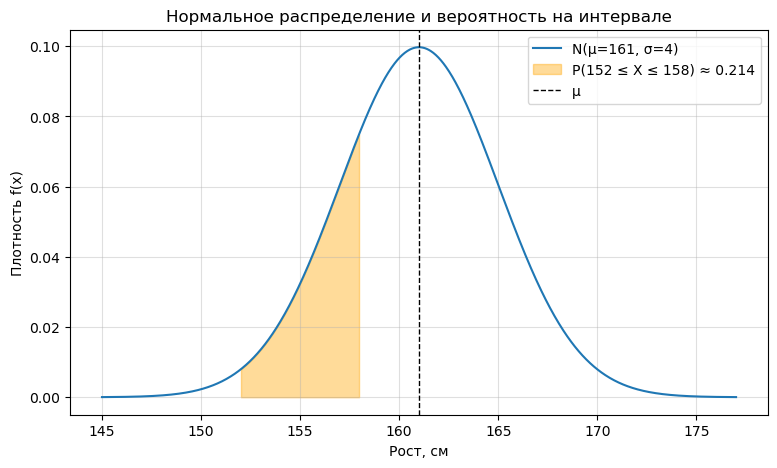

In [22]:
# code
# параметры распределения
mu = 161   # среднее
sigma = 4  # стандартное отклонение

# интервал для выделения
a, b = 152, 158

# сетка по оси X
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# вероятность попасть в интервал [a, b]
prob = norm.cdf(b, loc=mu, scale=sigma) - norm.cdf(a, loc=mu, scale=sigma)

# строим график
plt.figure(figsize=(9, 5))
plt.plot(x, pdf, label=f'N(μ={mu}, σ={sigma})')
# выделяем закрашенный фрагмент
mask = (x >= a) & (x <= b)
plt.fill_between(x[mask], pdf[mask], alpha=0.4, color='orange',
                 label=f'P({a} ≤ X ≤ {b}) ≈ {prob:.3f}')

# вспомогательные линии
plt.axvline(mu, linestyle='--', color='black', linewidth=1, label='μ')

plt.xlabel('Рост, см')
plt.ylabel('Плотность f(x)')
plt.title('Нормальное распределение и вероятность на интервале')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


❓От чего зависит форма кривой нормального распределения? 

> от стандартного отклонения 

**8**. Среднее время обслуживания одного клиента составляет 10 минут, а стандартное отклонение равно 2 минутам. Выстроилось очередь из 20 клиентов. Какова вероятность, что среднее время обсулуживание этих клиентов будет меньше 11 минут

`Подсказка: Центральная предельная теорема`

In [23]:
mu = 10 
sigma = 2
n =20 
sigma_bar = sigma / np.sqrt(n)

prob = norm.cdf(11, loc=mu, scale=sigma_bar)
prob

np.float64(0.9873263406612659)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "stat tasks completed"`
4. Выполни команду `git push`